<a href="https://colab.research.google.com/github/FarazAhmad2/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### We have used 4 different datasets in this project. We first split each dataset into train and test set. After splitting, we merge train set of each dataset and shuffle them. For ML modelling, we again split this new dataset into train and validation set. Then we test this model on individual test sets (that we created in the beginning).

In [1]:
import numpy as np       
import pandas as pd       
import matplotlib.pyplot as plt   # for data visualisation
import itertools
import re   # for string operations

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# hyperparameter tuning 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split    # train test split
# evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
# transforming text into numerical format
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <b> Splitting the datasets into train and test </b>

In [3]:
# Dataset link:  https://www.kaggle.com/competitions/fake-news/data
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zummit Infolabs/Fake News Detection/train.csv')
df1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train1, test1 = train_test_split(df1, test_size=0.2, stratify=df1.label)

In [5]:
# Dataset link:  https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zummit Infolabs/Fake News Detection/news.csv')
df2.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# encoding the target variable into numerical format
encoder = {'label': {'FAKE':1, 'REAL':0}}
df2 = df2.replace(encoder)

In [7]:
train2, test2 = train_test_split(df2, test_size=0.2, stratify=df2.label)

In [8]:
# Dataset link:  https://www.kaggle.com/datasets/mohamadalhasan/a-fake-news-dataset-around-the-syrian-war
df3 = pd.read_csv('/content/fake_news.csv',encoding='latin')
df3.rename(columns={'article_title':'title', 'article_content':'text'}, inplace=True)
df3.head() # 0 means FAKE news and 1 means TRUE news in this this dataset

,unit_id,title,text,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0


In [9]:
# creating new target variable so that FAKE news are represented by 1 and TRUE news by 0
df3['label'] = df3['labels'].apply(lambda x: 1 if x==0 else 0)

In [10]:
train3, test3 = train_test_split(df3, test_size=0.2, stratify=df3.label)

In [11]:
# Dataset link:  https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
fake_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zummit Infolabs/Fake News Detection/Fake.csv')
true_news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zummit Infolabs/Fake News Detection/True.csv')

In [12]:
# creating labels
fake_news['label'] = 1
true_news['label'] = 0

# Mixing fake and true datasets
df4 = pd.concat([true_news,fake_news])
df4 = df4.sample(frac=1).reset_index(drop=True)

In [13]:
df4.head()

,title,text,subject,date,label
0,Pope criticizes politicians for stoking racism...,VATICAN CITY (Reuters) - Pope Francis on Frida...,worldnews,"November 24, 2017",0
1,Obama Teasing Stephen Curry For ‘Clowning’ Ju...,One of the awesome things you get to do when y...,News,"February 4, 2016",1
2,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,18-Feb-18,1
3,Sally Yates: I Refused To Lie And Say Muslim ...,Former Acting Attorney General Sally Yates was...,News,"June 28, 2017",1
4,Venezuela's injured activists struggle to heal,"CARACAS (Reuters) - Jesus Ibarra, a 19-year-ol...",worldnews,"August 24, 2017",0


In [14]:
train4, test4 = train_test_split(df4, test_size=0.2, stratify=df4.label)

# <b> Merging all the train datasets </b> 

In [15]:
train = pd.concat([train1.loc[:,['title','text','label']],
                  train2.loc[:,['title','text','label']],
                  train3.loc[:,['title','text','label']],
                  train4.loc[:,['title','text','label']]])

In [16]:
# checking null values
train.isna().sum()

title    438
text      31
label      0
dtype: int64

In [17]:
# removing null values
train.dropna(inplace=True)

In [18]:
# Checking for duplicate values
len(train[train.duplicated()])

5535

In [19]:
# removing duplicated values
train.drop_duplicates(inplace=True)

In [20]:
train = train.sample(frac=1).reset_index(drop=True)

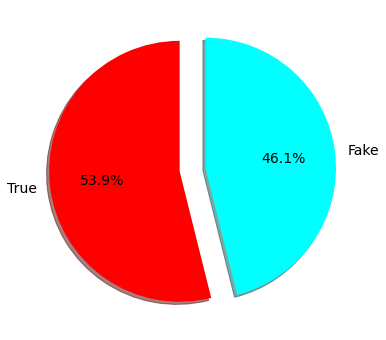

In [21]:
# Checking if our data is well balanced
plt.figure(figsize=(9,6))
plt.pie(train['label'].value_counts(),explode=[0.1,0.1],colors=['red','cyan'],startangle=90,shadow=True,labels=['True','Fake'],autopct='%1.1f%%',textprops={'fontsize': 14});

In [22]:
# removing the commoner inflexional endings from words in English
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
stop_words = stopwords.words('english')
text_cleaning_re = '[^a-zA-Z]'

In [24]:
# function for text processing
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()     # use re package to removing everything that is not in letter
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [25]:
# text processing
train['text'] = train['text'].apply(lambda x: preprocess(x))
train['text'].head()

0    washington reuters u military said tuesday cou...
1    cameras banned white house press briefings cnn...
2    border patrol agents found tens thousands mari...
3    even need ask white west point cadets posing u...
4    welcome picks guide best stuff read watch list...
Name: text, dtype: object

In [26]:
X = train.text.values           # independent variable
y = train.label.values          # dependent variable

In [27]:
# splitting the dataset into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)

In [28]:
# transform our textual X to numerical so that our ML model can understand it and can work with it
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3),max_df=0.7)

tfidf_train = tfidf_v.fit_transform(X_train).toarray()
tfidf_val = tfidf_v.transform(X_val).toarray()

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# <b> RandomForest Classifier </b>

### <b> Hyperparameter tuning </b>

In [30]:
# rf_clf = RandomForestClassifier()

# # Hyperparameter Grid
# rf_grid = {'n_estimators' : [100,150],
#         'max_depth' : [4,6,8],
#         'min_samples_split' : [50,80],
#         'min_samples_leaf' : [46,60]}

# # RandomSearch to find the best parameters
# rf_random = RandomizedSearchCV(rf_clf, param_distributions= rf_grid, scoring = 'accuracy', cv=5)
# rf_random.fit(tfidf_train,y_train)

# rf_random.best_params_

In [31]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=50, min_samples_leaf=46)
rf_clf.fit(tfidf_train,y_train)
tr_preds = rf_clf.predict(tfidf_train)  # predicting train
preds = rf_clf.predict(tfidf_val)       # predicting validation

In [32]:
print('Train accuracy:',accuracy_score(y_train, tr_preds))
print('Validation accuracy:',accuracy_score(y_val, preds))

Train accuracy: 0.8609011766956854
Validation accuracy: 0.8553525303740553


In [33]:
# train classification report for RandomForest
print(classification_report(y_train,tr_preds))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88     22533
           1       0.94      0.75      0.83     19279

    accuracy                           0.86     41812
   macro avg       0.88      0.85      0.86     41812
weighted avg       0.87      0.86      0.86     41812



In [34]:
# validation classification report for RandomForest
print(classification_report(y_val,preds))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      5633
           1       0.93      0.74      0.83      4820

    accuracy                           0.86     10453
   macro avg       0.87      0.85      0.85     10453
weighted avg       0.87      0.86      0.85     10453



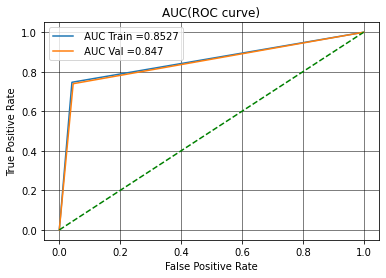

In [35]:
# train and validation ROC-AUC curve for RandomForest

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, tr_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_val, preds)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC Train ="+str(auc(train_fpr, train_tpr).round(4)))
plt.plot(test_fpr, test_tpr, label=" AUC Val ="+str(auc(test_fpr, test_tpr).round(4)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion matrix, without normalization


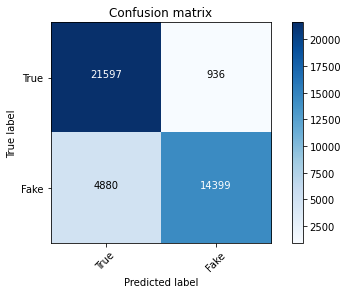

In [36]:
# train confusion matrix for RandomForest
cm_train = confusion_matrix(y_train,tr_preds)
plot_confusion_matrix(cm_train,classes=['True','Fake'])

Confusion matrix, without normalization


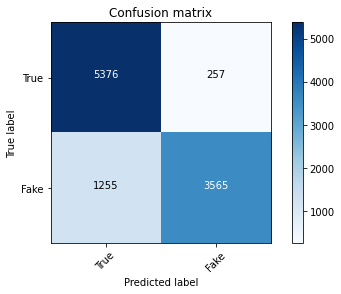

In [37]:
# validation confusion matrix for RandomForest
cm_test = confusion_matrix(y_val,preds)
plot_confusion_matrix(cm_test,classes=['True','Fake'])

# <b> Logistic Regression </b>

### <b> Hyperparameter tuning </b>

In [38]:
# lr = LogisticRegression(fit_intercept=True, max_iter=10000)

# # Hyperparameter Grid
# lr_grid = {'C':[0.1,0.5,0.8,1,2,3,5,8,10,20,50,100]}

# # RandomSearch to find the best parameters
# lr_random = RandomizedSearchCV(lr, param_distributions= lr_grid, scoring = 'roc_auc', cv=5)
# lr_random.fit(tfidf_train,y_train)

# lr_random.best_params_

In [39]:
lr = LogisticRegression(C=2, max_iter=10000)
lr.fit(tfidf_train,y_train)
tr_preds = lr.predict(tfidf_train)
preds = lr.predict(tfidf_val)

In [40]:
print('Train accuracy:',accuracy_score(y_train, tr_preds))
print('Validation accuracy:',accuracy_score(y_val, preds))

Train accuracy: 0.9580742370611308
Validation accuracy: 0.9408782167798718


In [41]:
print(classification_report(y_train, tr_preds))       # train

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22533
           1       0.96      0.95      0.95     19279

    accuracy                           0.96     41812
   macro avg       0.96      0.96      0.96     41812
weighted avg       0.96      0.96      0.96     41812



In [42]:
print(classification_report(y_val, preds))     # validation

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      5633
           1       0.93      0.94      0.94      4820

    accuracy                           0.94     10453
   macro avg       0.94      0.94      0.94     10453
weighted avg       0.94      0.94      0.94     10453



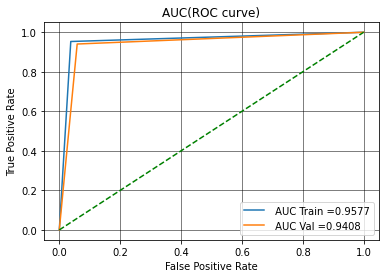

In [43]:
# train and validation ROC-AUC curve for Logistic Regression
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, tr_preds)
test_fpr, test_tpr, te_thresholds = roc_curve(y_val, preds)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC Train ="+str(auc(train_fpr, train_tpr).round(4)))
plt.plot(test_fpr, test_tpr, label=" AUC Val ="+str(auc(test_fpr, test_tpr).round(4)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Confusion matrix, without normalization


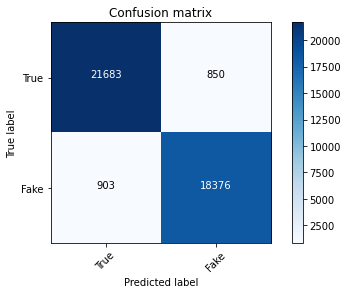

In [44]:
# train confusion matrix for Logistic Regession
cm_train = confusion_matrix(y_train,tr_preds)
plot_confusion_matrix(cm_train,classes=['True','Fake'])

Confusion matrix, without normalization


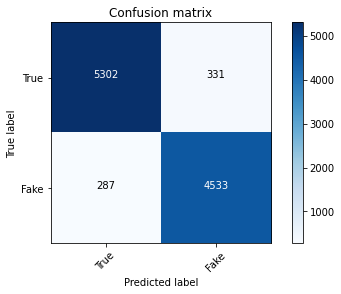

In [45]:
# validation confusion matrix for Logistic Regession
cm_test = confusion_matrix(y_val,preds)
plot_confusion_matrix(cm_test,classes=['True','Fake'])

# <b> Testing on different datasets </b>

## <b> test1 </b>

In [46]:
test1 = test1.dropna().reset_index(drop=True)
X1 = test1.title.values
X1_tfidf = tfidf_v.transform(X1).toarray()
test1['label_rf'] = rf_clf.predict(X1_tfidf)       # RandomForest model
test1['label_lr'] = lr.predict(X1_tfidf)           # Logistic Regression model
test1.head(10)

,id,title,author,text,label,label_rf,label_lr
0,5888,"China Machado, Breakthrough Model Until the En...",Vanessa Friedman,"China Machado, one of the first to appear in...",0,0,1
1,16862,How Functional Medicine Can Cure Dementia and ...,Admin - Orissa,by Paul Fassa Health Impact News \nAn episode ...,1,1,1
2,12009,"Comment on After Fighting for Freedom, 76-yo V...",Chris Wilson,Home / Health / Medical Marijuana / After Figh...,1,1,1
3,16252,New Guideline Will Allow First-Year Doctors to...,Gina Kolata and Jan Hoffman,doctors in training will now be permitted to...,0,0,1
4,19362,While Donald Rakes In Donations From Poor Supp...,Ellen Brodsky,While Donald Rakes In Donations From Poor Supp...,1,1,1
5,8439,13 Year Old Girl’s Rousing Speech: “If Donald ...,Mac Slavo,Who can argue with this young lady’s speech?\n...,1,0,1
6,16131,Hundreds of rescued refugees arrive at Italian...,Pakalert,Support Us Hundreds of rescued refugees arrive...,1,1,1
7,19405,Trump Rejects Neocon Turncoats - Russia Launch...,b,Wikipedia: Eliot A. Cohen ... co-founded the P...,1,1,1
8,14544,It’s Going to Change RADICALLY With Silver – H...,The Doc,Tweet Home » Silver » Silver News » It’s Going...,1,1,1
9,16563,Justice Dept. Sues Michigan City After Mosque ...,Christine Hauser,The Department of Justice has filed a lawsuit ...,0,0,1


In [47]:
accuracy_score(test1.label,test1.label_rf)    # RandomForest model

0.8142701525054467

In [48]:
print(classification_report(test1.label,test1.label_rf))    # RandomForest model

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2071
           1       0.73      0.90      0.81      1601

    accuracy                           0.81      3672
   macro avg       0.82      0.82      0.81      3672
weighted avg       0.83      0.81      0.81      3672



Confusion matrix, without normalization


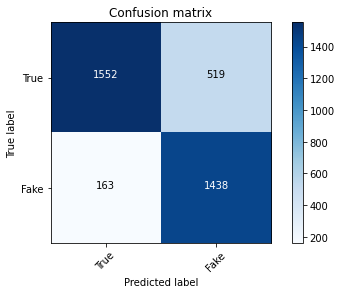

In [49]:
cm1_rf = confusion_matrix(test1.label,test1.label_rf)       # RandomForest model
plot_confusion_matrix(cm1_rf,classes=['True','Fake'])

In [50]:
accuracy_score(test1.label,test1.label_lr)      # Logistic Regression model

0.5964052287581699

In [51]:
print(classification_report(test1.label,test1.label_lr))    # Logistic Regression model

              precision    recall  f1-score   support

           0       0.96      0.30      0.45      2071
           1       0.52      0.98      0.68      1601

    accuracy                           0.60      3672
   macro avg       0.74      0.64      0.57      3672
weighted avg       0.77      0.60      0.55      3672



Confusion matrix, without normalization


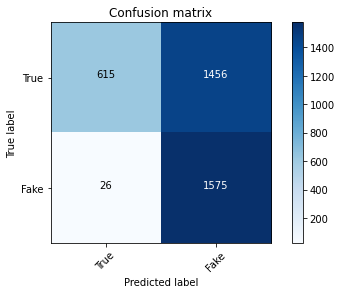

In [52]:
cm1_lr = confusion_matrix(test1.label,test1.label_lr)     # Logistic Regression model
plot_confusion_matrix(cm1_lr,classes=['True','Fake'])

## <b> test2 </b>

In [53]:
test2 = test2.dropna().reset_index(drop=True)
X2 = test2.text.values
X2_tfidf = tfidf_v.transform(X2).toarray()
test2['label_rf'] = rf_clf.predict(X2_tfidf)      # RandomForest model
test2['label_lr'] = lr.predict(X2_tfidf)          # Logistic Regression model
test2.head(10)

,Unnamed: 0,title,text,label,label_rf,label_lr
0,294,Louie Gohmert For House Speaker?,WASHINGTON -- Rep. Louie Gohmert (R-Texas) lau...,0,0,0
1,10399,Fighting Ghost Fascists While Aiding Real Ones,2016 presidential campaign by BAR executive ed...,1,1,1
2,6014,Hillary Clinton has a deep commitment.,(7 fans) - Advertisement - \nHillary Clinton i...,1,1,1
3,1009,Donald Trump’s “days of rage”: As the GOP prim...,"And the results, as everyone who’s been paying...",0,0,0
4,7985,Federal Election Commission (“FEC”) Is Another...,VA Backlog Means Thousands Of Veterans Owed Mo...,1,0,0
5,8164,Exposed: Stunning CNN Super Damage Control In ...,"in: Mainstream Media , Multimedia , Propaganda...",1,1,1
6,2445,"Obamacare Is Back At The Supreme Court, And Th...",bamacare is back before the Supreme Court in a...,0,0,0
7,5590,Pentagon: No Plan ‘So Far’ For US Troops to En...,"Officials Concede Plan Could Change, as Could ...",1,0,1
8,8911,JUST IN: FBI Reopens Hillary Clinton Email Probe,JUST IN: FBI Reopens Hillary Clinton Email Pro...,1,0,1
9,5936,Devastating aftermath of twin quakes in Italy ...,Drone footage shows the devastation caused by ...,1,1,1


In [54]:
accuracy_score(test2.label,test2.label_rf)      # RandomForest model

0.734017363851618

In [55]:
print(classification_report(test2.label,test2.label_rf))      # RandomForest model

              precision    recall  f1-score   support

           0       0.69      0.86      0.76       634
           1       0.81      0.61      0.70       633

    accuracy                           0.73      1267
   macro avg       0.75      0.73      0.73      1267
weighted avg       0.75      0.73      0.73      1267



Confusion matrix, without normalization


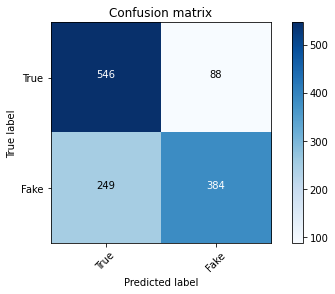

In [56]:
cm2_rf = confusion_matrix(test2.label,test2.label_rf)       # RandomForest model
plot_confusion_matrix(cm2_rf,classes=['True','Fake'])

In [57]:
accuracy_score(test2.label,test2.label_lr)      # Logistic Regression model

0.8571428571428571

In [58]:
print(classification_report(test2.label,test2.label_lr))      # Logistic Regression model

              precision    recall  f1-score   support

           0       0.93      0.78      0.84       634
           1       0.81      0.94      0.87       633

    accuracy                           0.86      1267
   macro avg       0.87      0.86      0.86      1267
weighted avg       0.87      0.86      0.86      1267



Confusion matrix, without normalization


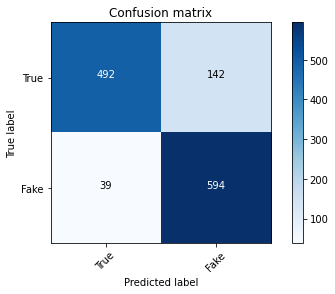

In [59]:
cm2_lr = confusion_matrix(test2.label,test2.label_lr)     # Logistic Regression model
plot_confusion_matrix(cm2_lr,classes=['True','Fake'])

## <b> test3 </b>

In [60]:
test3 = test3.dropna().reset_index(drop=True)
test3.drop('labels', axis=1, inplace=True)
X3 = test3.text.values
X3_tfidf = tfidf_v.transform(X3).toarray()
test3['label_rf'] = rf_clf.predict(X3_tfidf)      # RandomForest model
test3['label_lr'] = lr.predict(X3_tfidf)          # Logistic Regression model
test3.head(10)

,unit_id,title,text,source,date,location,label,label_rf,label_lr
0,1965511144,Syrian Army Ambushes Kills 140 ISIL Terrorists...,21-08-2014 Syrian Army Ambushes Kills 140 ISIL...,manar,8/21/2014,raqqa,0,0,0
1,1924058103,Suicide bomber targets Syrian wedding 20 killed,3 Oct 2016 At least 20 people were killed and ...,trt,10/3/2016,hasakeh,1,0,1
2,1923848183,12 civilians dead in Syrian raid on IS-held vi...,12 civilians dead in Syrian raid on IS-held vi...,ahram,7/22/2015,aleppo,0,0,0
3,1924058150,6 civilians killed 35 injured in Assad regime ...,Published April 26 2017 At least 6 civilians w...,dailysabah,4/13/2017,idlib,1,0,1
4,1923848174,Coalition air strikes Turkish army kill 8 IS g...,Coalition air strikes Turkish army kill 8 IS g...,ahram,7/10/2016,quneitra,0,0,0
5,1924058078,At least 100 killed after bomb hits bus convoy...,15 Apr 2017 The attack took place as thousands...,trt,4/2/2017,aleppo,1,0,1
6,1918150030,58 Killed in Suspected Gas Attack in Syrias Idlib,Posted on April 4 2017 by Asharq Al-Awsat Engl...,asharqalawsat,4/4/2017,idlib,0,0,0
7,1965511142,Syrian Army Kills 15 Terrorists in Qalamoun Ad...,29-08-2014 Syrian Army Kills 15 Terrorists in ...,manar,8/29/2014,damascus,0,0,1
8,1926479296,ISIS attacks Kurdish-held town on Turkish border,Saturday 27 February 2016 ISIS attacks Kurdish...,arabiya,2/27/2016,raqqa,1,0,0
9,1965495378,US Coalition Strike Accidentally Kills 18 Kurd...,13.04.2017) Get short URL Topic Operation to L...,sputnik,4/13/2017,raqqa,0,1,1


In [61]:
accuracy_score(test3.label,test3.label_rf)      # RandomForest model

0.5031055900621118

In [62]:
print(classification_report(test3.label,test3.label_rf))      # RandomForest model

              precision    recall  f1-score   support

           0       0.52      0.93      0.66        85
           1       0.25      0.03      0.05        76

    accuracy                           0.50       161
   macro avg       0.38      0.48      0.36       161
weighted avg       0.39      0.50      0.37       161



Confusion matrix, without normalization


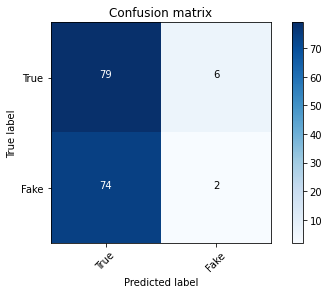

In [63]:
cm3_rf = confusion_matrix(test3.label,test3.label_rf)       # RandomForest model
plot_confusion_matrix(cm3_rf,classes=['True','Fake'])

In [64]:
accuracy_score(test3.label,test3.label_lr)      # Logistic Regression model

0.5341614906832298

In [65]:
print(classification_report(test3.label,test3.label_lr))      # Logistic Regression model

              precision    recall  f1-score   support

           0       0.55      0.61      0.58        85
           1       0.51      0.45      0.48        76

    accuracy                           0.53       161
   macro avg       0.53      0.53      0.53       161
weighted avg       0.53      0.53      0.53       161



Confusion matrix, without normalization


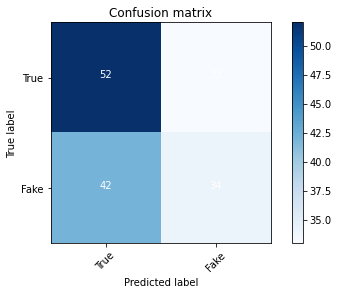

In [66]:
cm3_lr = confusion_matrix(test3.label,test3.label_lr)       # Logistic Regression model
plot_confusion_matrix(cm3_lr,classes=['True','Fake'])

## <b> test4 </b>

In [67]:
test4 = test4.dropna().reset_index(drop=True)
X4 = test4.text.values
X4_tfidf = tfidf_v.transform(X4).toarray()
test4['label_rf'] = rf_clf.predict(X4_tfidf)      # RandomForest model
test4['label_lr'] = lr.predict(X4_tfidf)          # Logistic Regression model
test4.head(10)

,title,text,subject,date,label,label_rf,label_lr
0,Republican Kasich suspends presidential campai...,WASHINGTON (Reuters) - Republican John Kasich ...,politicsNews,"May 4, 2016",0,0,0
1,Pope says his defense of Rohingya got through ...,ABOARD THE PAPAL PLANE (Reuters) - Pope Franci...,worldnews,"December 2, 2017",0,0,0
2,Beatles Drummer Ringo Starr Will Not Perform ...,North Carolina Republicans who are fans of The...,News,"April 14, 2016",1,1,1
3,THIS Is Trump’s Definition Of ‘Fair’ Media Co...,Trump hates the media with a passion. He often...,News,"August 17, 2016",1,1,1
4,FIND OUT IF YOUR SENATOR VOTED TO HELP OBAMA W...,Remember Joni Ernst? Conservatives were so exc...,Government News,"Jun 23, 2015",1,0,1
5,Federal judges question intent behind North Ca...,WASHINGTON (Reuters) - Federal appeals court j...,politicsNews,"June 21, 2016",0,0,0
6,Deadly U.S. raid may bolster Yemen's al Qaeda ...,DUBAI (Reuters) - A commando raid approved by ...,politicsNews,"February 2, 2017",0,0,0
7,UNHOLY ALLIANCE: Hillary Clinton’s Saudi Spons...,21st Century Wire says Amid the tossing and t...,Middle-east,"August 26, 2016",1,1,1
8,BREAKING FL VOTER FRAUD ALERT: “Tens Of Thousa...,https://twitter.com/TEN_GOP/status/79389017105...,politics,"Nov 2, 2016",1,1,1
9,Thin-Skinned Trump Whines About Election Resu...,It s been two months since the 2016 Election t...,News,"January 2, 2017",1,1,1


In [68]:
accuracy_score(test4.label,test4.label_rf)      # RandomForest model

0.8989977728285078

In [69]:
print(classification_report(test4.label,test4.label_rf))      # RandomForest model

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4284
           1       1.00      0.81      0.89      4696

    accuracy                           0.90      8980
   macro avg       0.91      0.90      0.90      8980
weighted avg       0.92      0.90      0.90      8980



Confusion matrix, without normalization


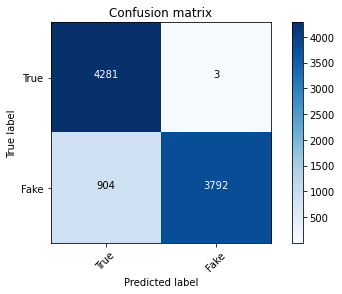

In [70]:
cm4_rf = confusion_matrix(test4.label,test4.label_rf)       # RandomForest model
plot_confusion_matrix(cm4_rf,classes=['True','Fake'])

In [71]:
accuracy_score(test4.label,test4.label_lr)      # Logistic Regression model

0.9697104677060133

In [72]:
print(classification_report(test4.label,test4.label_lr))      # Logistic Regression model

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4284
           1       0.99      0.95      0.97      4696

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



Confusion matrix, without normalization


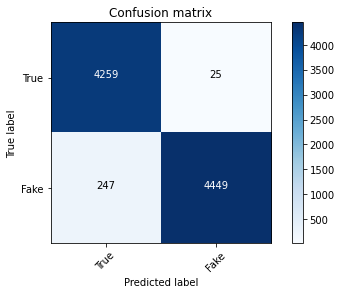

In [73]:
cm4_lr = confusion_matrix(test4.label,test4.label_lr)       # Logistic Regression model
plot_confusion_matrix(cm4_lr,classes=['True','Fake'])

# <b> Conclusion </b>
* ### <b> Logistic Regression model </b> is performing very well as compared to <b> Random Forest model </b>.
* ### Whether it is accuracy, recall, precision or the f1-score, <b> Logistic Regression model </b> yields the best results.

# <b> Use Cases </b>
* ### The model can be deployed on fact checking websites and apps.
* ### The model can also be implemented in chat-apps in the form of Bot accounts. 